In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor


In [4]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [5]:
encoder = OneHotEncoder(sparse=False)
encoded_workouts = encoder.fit_transform(df[['Workout_Type']])
encoded_df = pd.DataFrame(encoded_workouts, columns=encoder.categories_[0])
df = pd.concat([df, encoded_df], axis=1)


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
df["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [7]:
df["Gender"] = df["Gender"].apply(lambda a :1 if a=="Male" else 0 )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [9]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Cardio',
       'HIIT', 'Strength', 'Yoga'],
      dtype='object')


In [10]:
a = df["Age"].value_counts().head(10).to_dict()
b = {k: v for k, v in sorted(a.items(), key=lambda item: item[1], reverse=True)}
b

{43: 34,
 50: 33,
 52: 32,
 45: 30,
 54: 30,
 22: 27,
 18: 27,
 42: 27,
 56: 27,
 49: 26}

In [11]:
a= df["Age"].value_counts().head(10).to_dict()
print("a ; " , a)
distinct_values_counts = {k: v for k, v in sorted(a.items(), key=lambda item: item[1], reverse=True)}
distinct_values_counts

a ;  {43: 34, 50: 33, 52: 32, 45: 30, 54: 30, 22: 27, 18: 27, 42: 27, 56: 27, 49: 26}


{43: 34,
 50: 33,
 52: 32,
 45: 30,
 54: 30,
 22: 27,
 18: 27,
 42: 27,
 56: 27,
 49: 26}

In [12]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Age,int64,0,973,42
1,Gender,int64,0,973,2
2,Weight (kg),float64,0,973,532
3,Height (m),float64,0,973,51
4,Max_BPM,int64,0,973,40
5,Avg_BPM,int64,0,973,50
6,Resting_BPM,int64,0,973,25
7,Session_Duration (hours),float64,0,973,147
8,Calories_Burned,float64,0,973,621
9,Workout_Type,object,0,973,4


In [13]:
# df.drop("Workout_Type" , axis=1 , inplace=True)

<Axes: xlabel='Gender'>

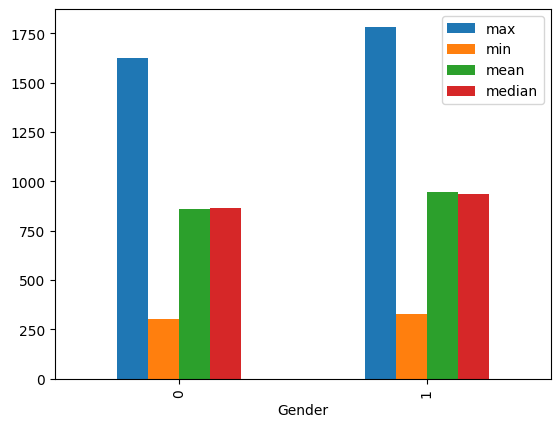

In [14]:
# sns.barplot( data=df,x=df["Max_BPM"] ,y= df["Gender"])
a = df.groupby("Gender")["Calories_Burned"].agg(["max" , "min" , "mean" , "median"])
a.plot(kind="bar")

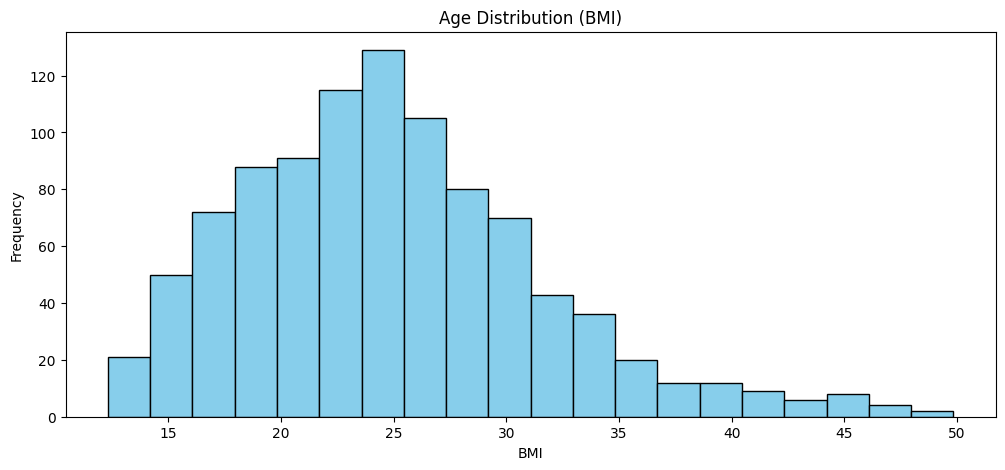

In [17]:
plt.figure(figsize=(12, 5))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution (BMI)')
plt.xlabel('BMI')
# plt.gcf().set_facecolor('#FFBF00')  
plt.ylabel('Frequency')
plt.show()

In [14]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Cardio',
       'HIIT', 'Strength', 'Yoga'],
      dtype='object')

In [139]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Cardio,HIIT,Strength,Yoga
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,46,0,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,0,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,25,1,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,38,1,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,0.0,0.0,1.0,0.0
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,0.0,0.0,1.0,0.0
970,59,0,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,1.0,0.0,0.0,0.0
971,32,1,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,0.0,1.0,0.0,0.0


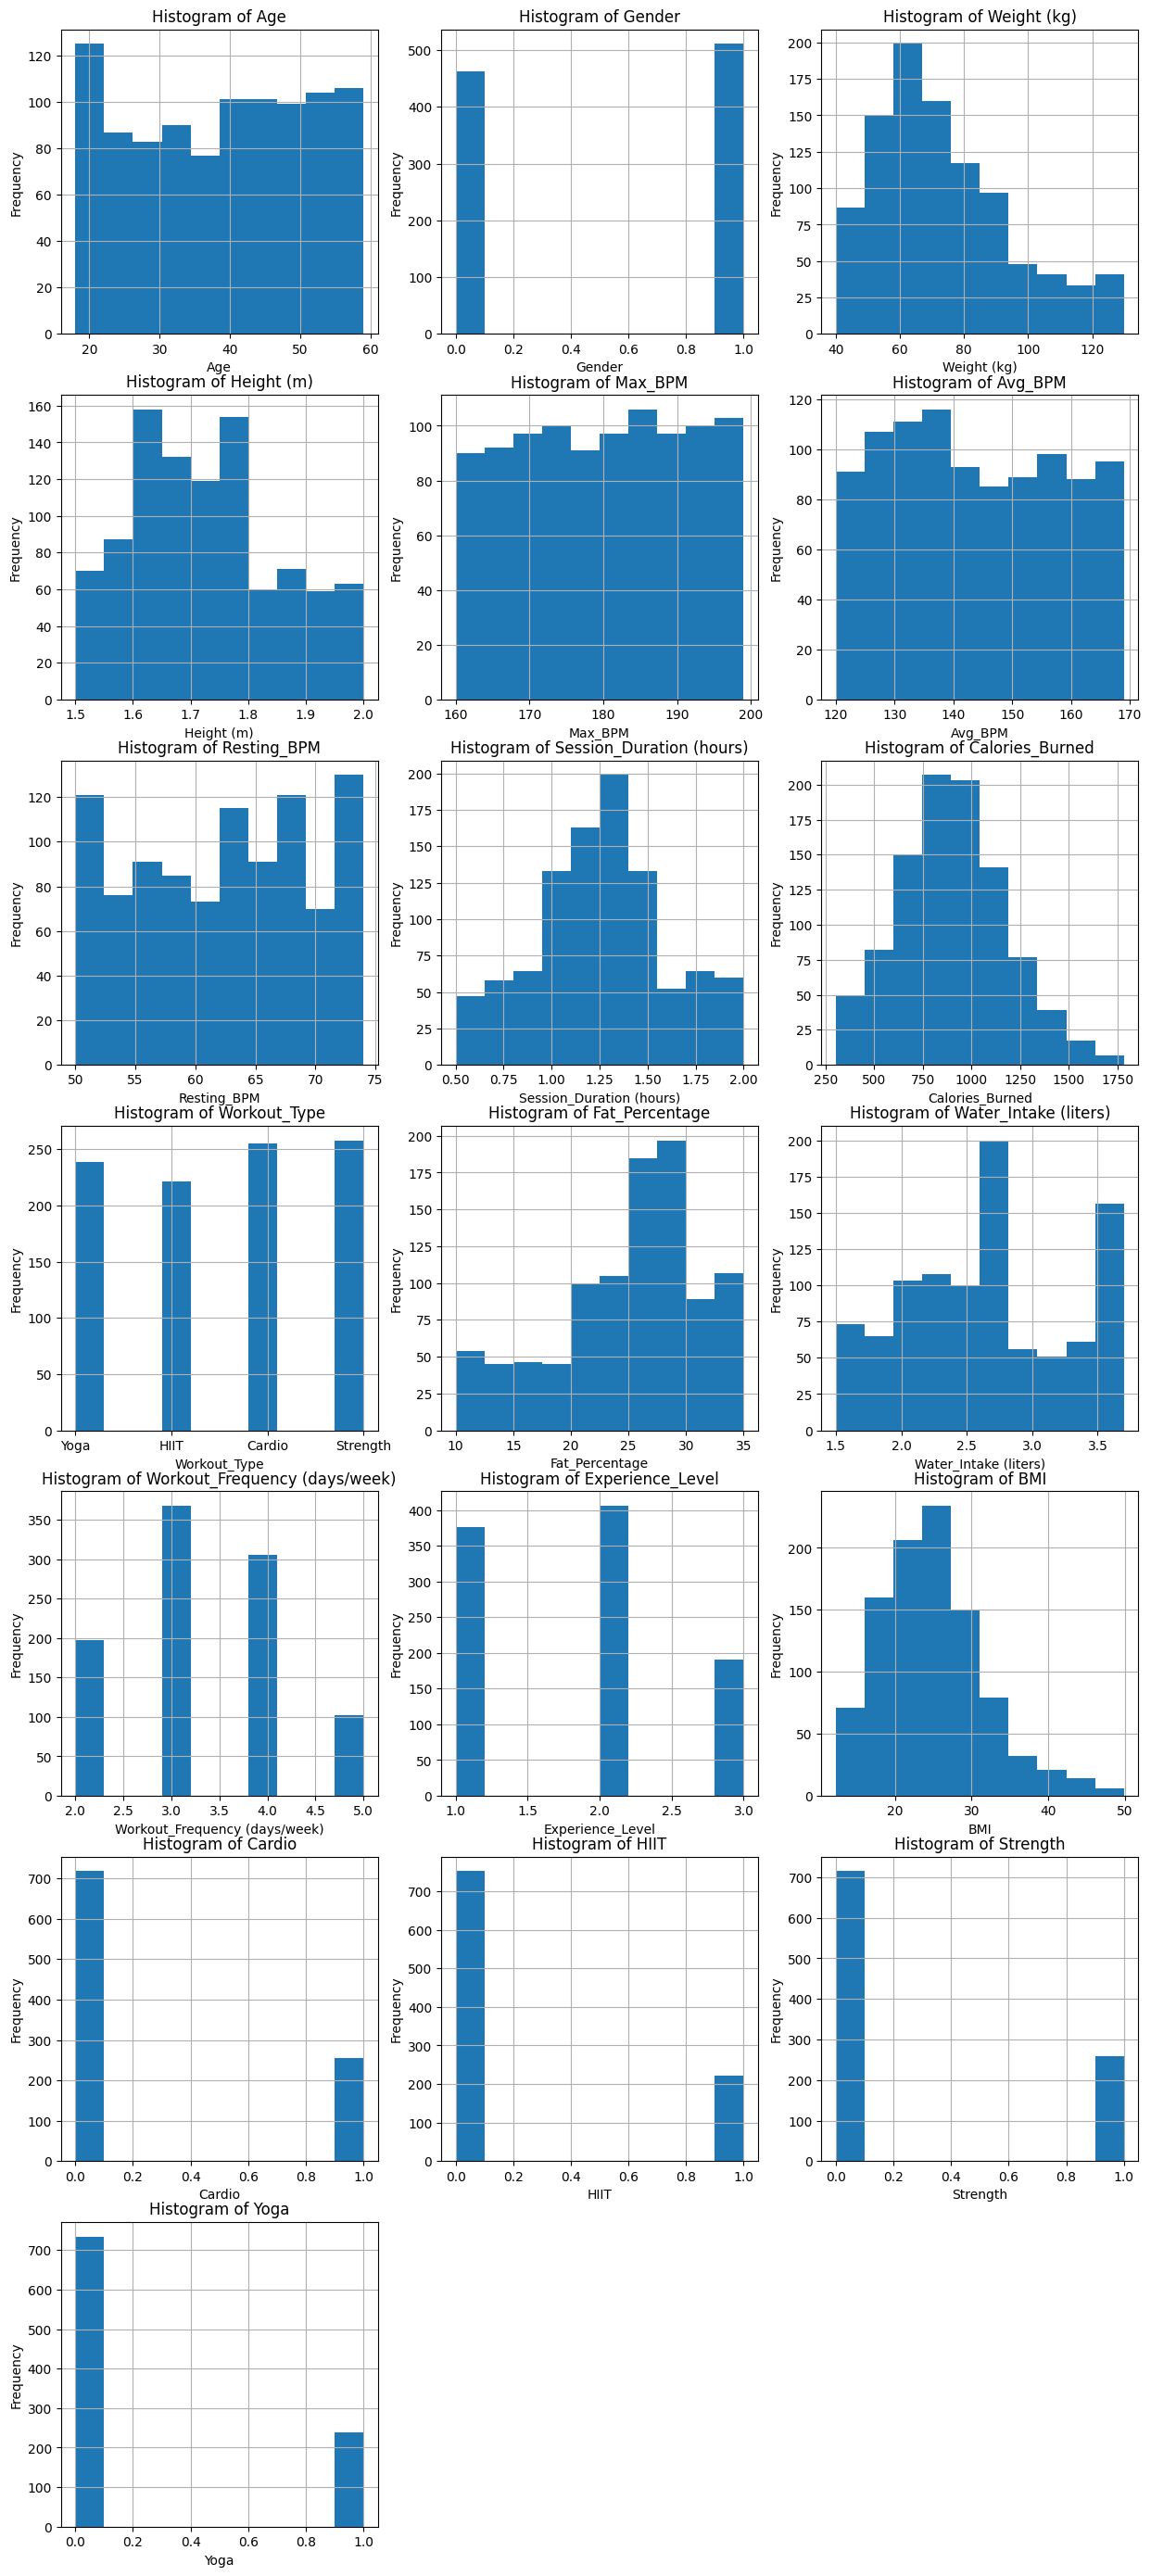

In [34]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, col in enumerate(df.columns):
    ax = axes[idx]
    df[col].hist(bins=10, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col) 
    ax.set_ylabel('Frequency') 

for idx in range(num_columns, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


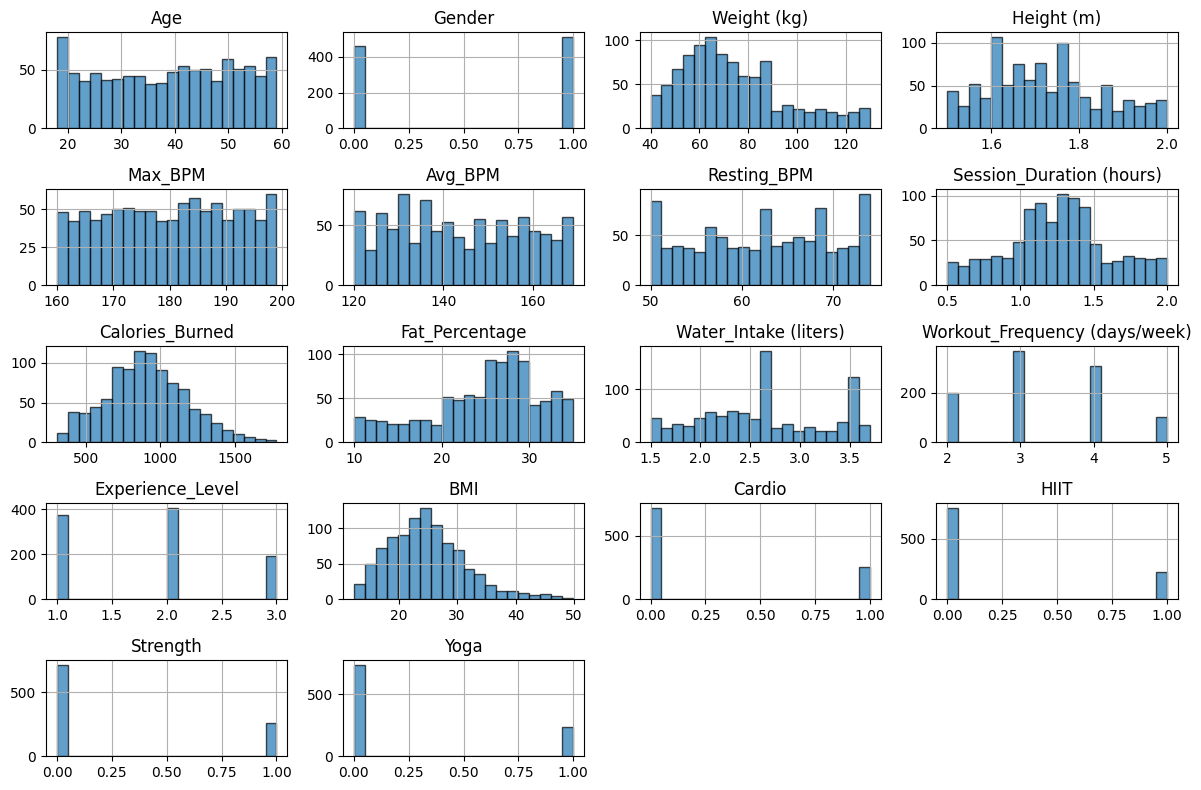

In [18]:
df.hist(figsize=(12, 8), bins=20, edgecolor="black", alpha=0.7)
plt.tight_layout()
plt.show()


In [146]:
x = df.drop(["BMI" , "Workout_Type"] , axis=1)
y=df["BMI"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [149]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
# Linear Regression:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.7409010584474166
0.98495562536079


In [151]:
# Decision Tree Regressor:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1.5073893835616439
0.9693916881951942


In [152]:
# Random Forest Regressor:


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.5952323442808224
0.9879135030478952


In [153]:

import xgboost as xgb

model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.4551502363110192
0.9907579418410645
